# Load libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Library to plot graphics
import seaborn as sns # to build modern graphics
import zipfile
import os

# Load datasets

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv("../data/raw/winemag-data_first150k.csv")
df2 = pd.read_csv("../data/raw/winemag-data-130k-v2.csv")
# Print the columns of the DataFrame to verify successful loading
display(df.head())
print()
display(df2.head())



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Concat datasets

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [5]:
df2.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [6]:
combined_df = pd.concat([df, df2], join = "outer").reset_index()
combined_df
#df.merge(df2, how = "right")

,index,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


# Checking for Null Values

In [7]:
# with this amount of Null values in col  taster_name,taster_twitter_handle and title .dropna might be in order 
combined_df.isna().sum()

index                         0
Unnamed: 0                    0
country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

# Dropping Null Values

### is it neccesary to drop so many rows?

In [8]:
#combined_df.dropna(subset = ["taster_name","taster_twitter_handle","title"])

# Filling null values

In [9]:
# all the nulls in column price changed to "0" and casted as float64,all the other null values changed to "Unknown"
combined_df["price"].fillna(0).astype(float)
combined_df.fillna("Unknown")

,index,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,Unknown,Unknown,Unknown
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Unknown,Tinta de Toro,Bodega Carmen Rodríguez,Unknown,Unknown,Unknown
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,Unknown,Unknown,Unknown
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,Unknown,Unknown,Unknown
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Unknown,Provence red blend,Domaine de la Bégude,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Unknown,Unknown,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,Unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,129967,129967,US,Citation is given as much as a decade of bottl...,Unknown,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Unknown,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",Unknown,90,32.0,Alsace,Alsace,Unknown,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [10]:
combined_df.dtypes

index                      int64
Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
variety                   object
winery                    object
taster_name               object
taster_twitter_handle     object
title                     object
dtype: object

In [11]:
combined_df.duplicated().sum()

0

# Removing Columns

In [31]:
# here I dropped columns using combined_df = combined_df.drop("Unnamed: 0", axis=1) and now I can´t get them back

combined_df

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,title
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,Citation 2004 Pinot Noir (Oregon)
280898,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [45]:
combined_df.columns

Index(['index', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery', 'taster_name',
       'title'],
      dtype='object')

#  Statistics of numerical data

In [65]:
# Display statistics for 'price' and 'points' columns
""" count:null values for the price column and points column
mean: average of price and points , 
std: The standard deviation for the price is about $38.61, indicating a wide range of prices, 
while the standard deviation for points is 3.15, showing less variability in ratings. 
min: The minimum price is $4, and the lowest rating is 80 points.
25%:of the wines cost $16 or less, and 25% have a rating of 86 points or less.
50% (median): The median price is $25, and the median rating is 88 points.
75%:of the wines cost $40 or less, and 75% have a rating of 90 points or less.
max: The maximum price of a wine is $3,300, and the highest rating is 100 points."""

statistics = combined_df[['price', 'points']].describe().round(2)

display("Statistics for 'price' and 'points':")
display(statistics)

"Statistics for 'price' and 'points':"

,price,points
count,258210.00,280901.00
mean,34.18,88.15
std,38.61,3.15
min,4.00,80.00
25%,16.00,86.00
50%,25.00,88.00
75%,40.00,90.00
max,3300.00,100.00


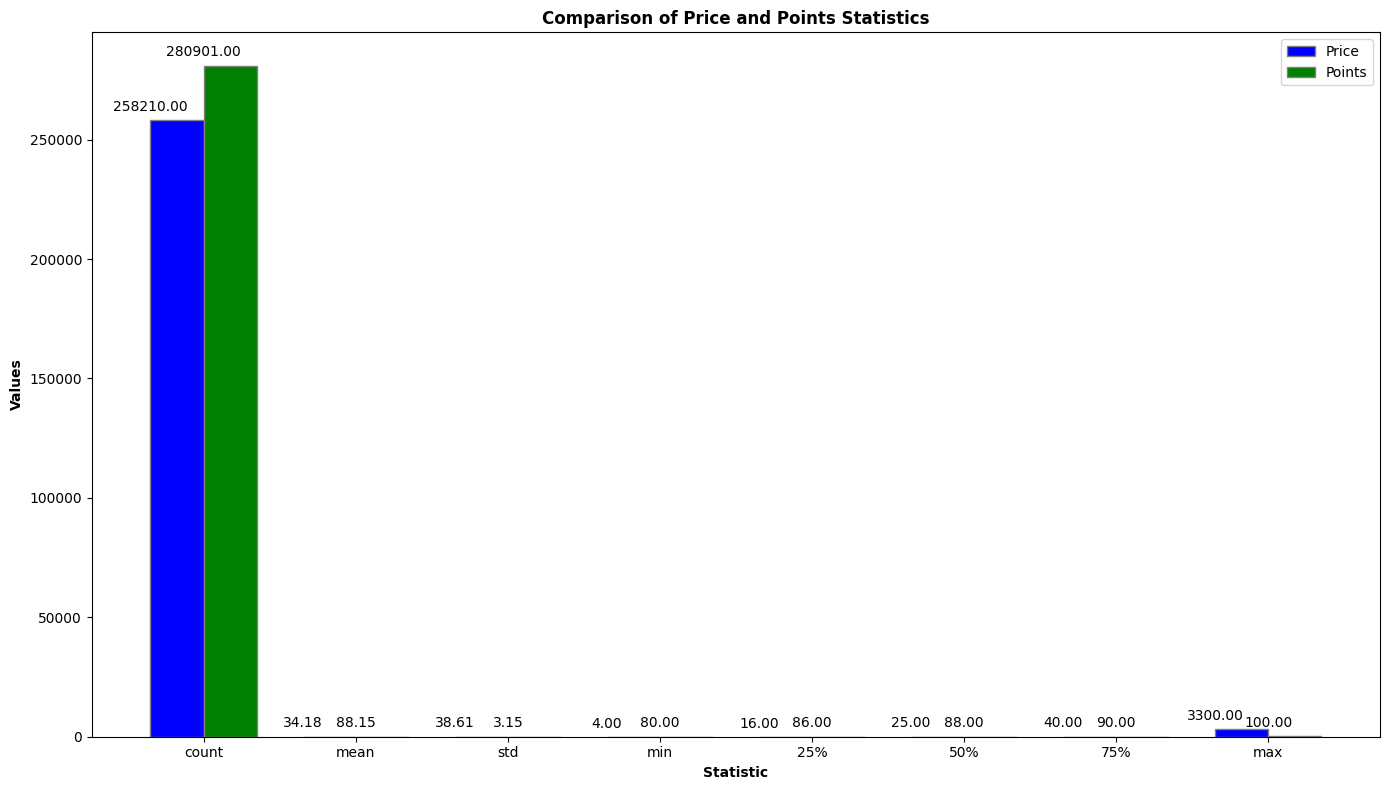

In [67]:
""" modify graph, maybe create one graph for each statistic, eg.
price	points
count	258210.00	280901.00 """  
%matplotlib inline
# Given statistics for 'price' and 'points'
stats_labels = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
price_stats = [258210.00, 34.18, 38.61, 4.00, 16.00, 25.00, 40.00, 3300.00]
points_stats = [280901.00, 88.15, 3.15, 80.00, 86.00, 88.00, 90.00, 100.00]

# Create a DataFrame for easier plotting

df_stats = pd.DataFrame({
    'Statistic': stats_labels,
    'Price': price_stats,
    'Points': points_stats
})

# Plotting bar charts
fig, ax = plt.subplots(figsize=(14, 8))

# Bar width
bar_width = 0.35

# Bar positions
r1 = np.arange(len(df_stats['Price']))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.bar(r1, df_stats['Price'], color='blue', width=bar_width, edgecolor='grey', label='Price')
plt.bar(r2, df_stats['Points'], color='green', width=bar_width, edgecolor='grey', label='Points')

# Adding labels and title
plt.xlabel('Statistic', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Comparison of Price and Points Statistics', fontweight='bold')

# Adding xticks
plt.xticks([r + bar_width/2 for r in range(len(df_stats['Statistic']))], df_stats['Statistic'])

# Adding values on top of bars
for i in range(len(r1)):
    plt.text(r1[i] - bar_width/2, df_stats['Price'][i] + max(df_stats['Price']) * 0.01, f"{df_stats['Price'][i]:.2f}", ha='center', va='bottom')
    plt.text(r2[i] - bar_width/2, df_stats['Points'][i] + max(df_stats['Points']) * 0.01, f"{df_stats['Points'][i]:.2f}", ha='center', va='bottom')

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Value count

In [54]:
# Calculate the most common grape varieties in the dataset
common_varieties = combined_df['variety'].value_counts()

# Print the most common grape varieties
display("Most common grape varieties in the dataset:")
display(common_varieties)

'Most common grape varieties in the dataset:'

variety
Pinot Noir                  27563
Chardonnay                  26235
Cabernet Sauvignon          22272
Red Blend                   19008
Bordeaux-style Red Blend    14262
                            ...  
Kangoun                         1
Paralleda                       1
Moschofilero-Chardonnay         1
Diamond                         1
Bobal-Cabernet Sauvignon        1
Name: count, Length: 756, dtype: int64

In [53]:
#Group by 'country' and count occurrences of each 'variety', then find the most common one
most_common_variety_by_country = combined_df.groupby('country')['variety'].agg(lambda x: x.value_counts().idxmax())

#print the most common grape variety by country
display("Most common grape variety by country:")
display(most_common_variety_by_country)

'Most common grape variety by country:'

country
Albania                                    Kallmet
Argentina                                   Malbec
Armenia                                    Kangoun
Australia                                   Shiraz
Austria                           Grüner Veltliner
Bosnia and Herzegovina                     Blatina
Brazil                                      Merlot
Bulgaria                        Cabernet Sauvignon
Canada                                    Riesling
Chile                           Cabernet Sauvignon
China                                   Chardonnay
Croatia                                Plavac Mali
Cyprus                                   Red Blend
Czech Republic                    Cabernet Moravia
Egypt                                     Grenache
England                            Sparkling Blend
France                    Bordeaux-style Red Blend
Georgia                                   Saperavi
Germany                                   Riesling
Greece                 

# Group by

In [38]:
# Calculate the average rating for each country
""" the data shows England, which I doubt, I´ll work more on this one, or does ir mean the are very gerenous when reviewing their wines? """

average_ratings_by_country = combined_df.groupby('country')['points'].mean().sort_values(ascending=False)

# Print the countries with the highest-rated wines
print("Countries producing the highest-rated wines:")
print(average_ratings_by_country)

Countries producing the highest-rated wines:
country
England                   91.722892
Austria                   89.707591
Germany                   89.200996
India                     89.000000
France                    88.884559
Canada                    88.880795
Italy                     88.481147
Morocco                   88.450000
US                        88.166106
Portugal                  88.157178
Slovenia                  88.154696
Australia                 88.112407
Turkey                    88.091549
Switzerland               88.090909
Hungary                   88.050398
US-France                 88.000000
Albania                   88.000000
New Zealand               87.778434
Israel                    87.752423
Luxembourg                87.666667
Serbia                    87.615385
South Africa              87.543591
Armenia                   87.500000
Bulgaria                  87.064220
Georgia                   86.961240
Spain                     86.932542
Czech Repub

In [44]:
# Group by 'variety' and 'country', then calculate the average rating
average_ratings_by_variety_country = combined_df.groupby(['variety', 'country'])['points'].mean().sort_values(ascending=False)

# Reset index to turn the MultiIndex into columns
average_ratings_by_variety_country = average_ratings_by_variety_country.reset_index()

# Print the grape varieties with the highest average ratings and their respective countries
display("Grape varieties with the highest average ratings and their countries:")
display(average_ratings_by_variety_country)

'Grape varieties with the highest average ratings and their countries:'

,variety,country,points
0,Cabernet-Shiraz,Australia,96.000000
1,Tinta del Pais,Spain,95.000000
2,Terrantez,Portugal,95.000000
3,Muscat,South Africa,94.666667
4,Muscadel,Australia,94.142857
...,...,...,...
1799,Chancellor,US,80.500000
1800,Sparkling Blend,Peru,80.000000
1801,Aleatico,US,80.000000
1802,Cinsault,Mexico,80.000000


In [50]:
# Group the data by both 'designation' and 'country' and calculate the average rating
designation_country_ratings = df.groupby(['designation', 'country'])['points'].mean()

# Sort the average ratings in descending order to find the top-rated designations
top_rated_designations = designation_country_ratings.sort_values(ascending=False)

# Display the top-rated designations along with their countries
print("Top 10 Best Rated Wine Origin Designations and Their Countries:")
print(top_rated_designations.head(10))  # Displaying the top 10 designations

Top 10 Best Rated Wine Origin Designations and Their Countries:
designation                     country  
Clos du Mesnil                  France       100.00
En Chamberlin Vineyard          US            99.75
Royal City Stoneridge Vineyard  US            99.00
Rockfall                        US            99.00
Monprivato                      Italy         99.00
Litton Estate Vineyard          US            98.80
Rare                            Australia     98.75
Maritime Vineyard               US            98.00
The Matriarch                   US            98.00
Heart Stoneridge Vineyard       US            98.00
Name: points, dtype: float64
